In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [2]:
billet = pd.read_csv('../Source/billets_complet.csv', sep=';')
billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
# Séparation des caractéristiques et de la cible
X = billet[['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']]
y = billet['is_genuine']  # Utiliser la colonne booléenne comme étiquette

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
from sklearn.model_selection import train_test_split

# Diviser en ensembles d'entraînement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Classification Report - Régression Logistique :
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       161
        True       0.99      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



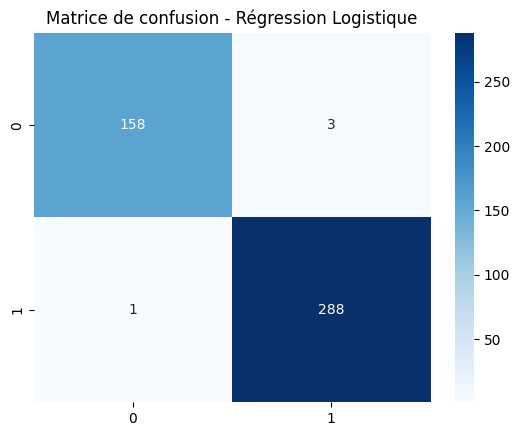

In [5]:
# Création du modèle de régression logistique

# Modèle de régression logistique
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Prédictions
y_pred_log = log_model.predict(X_test)

# Évaluation
print("Classification Report - Régression Logistique :")
print(classification_report(y_test, y_pred_log))

# Matrice de confusion
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Régression Logistique")
plt.show()


Classification Report - K-means :
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       161
        True       0.99      0.99      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



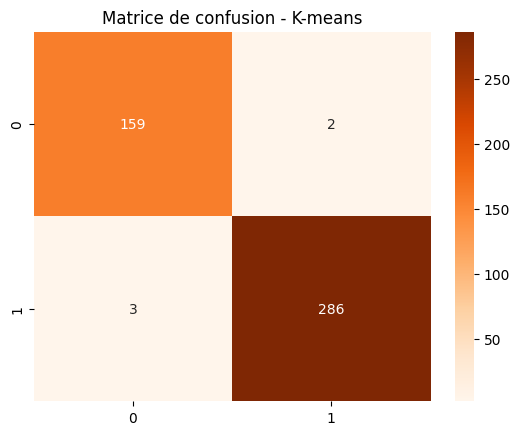

In [6]:
# Création du modèle de K-Means (Clustering+ Classification)

from sklearn.cluster import KMeans

# Appliquer K-means avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Prédictions des clusters
y_pred_kmeans = kmeans.predict(X_test)

# Mapper les clusters aux classes (exemple : vérifier quel cluster correspond à vrai/faux)
y_pred_kmeans = np.where(y_pred_kmeans == 0, 1, 0)  # Adapter selon vos données

# Évaluation
print("Classification Report - K-means :")
print(classification_report(y_test, y_pred_kmeans))

# Matrice de confusion
conf_matrix_kmeans = confusion_matrix(y_test, y_pred_kmeans)
sns.heatmap(conf_matrix_kmeans, annot=True, fmt='d', cmap='Oranges')
plt.title("Matrice de confusion - K-means")
plt.show()
